# **Integração Por Método do Trapézio**

Uma forma de calcular a integral de alguma função é utilizar do método do trapézio. 

Como na Soma de Rieman, utilizamos de retângulos, aqui usamos o trapézio. A quantidade de trapézio é definido por:

$h = \frac{b-a}{n}$

Onde $b$ e $a$ são os limites superior e inferior respectivamente (o inicio e o fim).

A integral é a soma das áreas do trapézio, para isso, a área pode ser calculada com a seguinte equação:

$I = \frac{h}{2}[f(x_0) + 2(f(x_1)+f(x_2) + ... + f(x_{n-1})) + f(x_n)]$

**ERRO**



Já erro da integral pode ser calculado por:

$\varepsilon = -\frac{n}{12}f^{''}(\tau)h^3$

# **EXEMPLO**

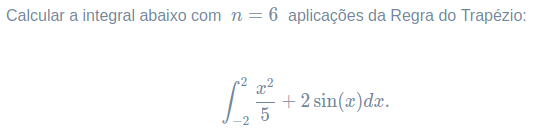

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Função
def f(x):
  return (x**2)/5 + 2*np.sin(x)

#Limites de integração e quantidade de trapezios
n = 6
b = 2
a = -2

Primeiro calculamos os intervalos dos trapézio.

In [ ]:
h = (b-a)/n
print(h)

0.6666666666666666


Após achar o espaçamento $h$, devemos criar uma tabela com os valores da função $f$ nesses pontos, ou seja, iremos acrescentar o valor de $h$ que encontramos no intervalo de $a$ até $b$ e gravar os valores da função nesses pontos

In [ ]:
quant_trp = int((b-a)/h+1)

x = np.zeros(quant_trp, dtype=np.float)
x[0] = a

for i in range(1, quant_trp):
  x[i] = x[i-1]+h
   
x.astype(np.float)

y = f(x)
y.astype(np.float)

print(f'Valores de x:\n{x}\n')
print(f'Valores de y:\n{y}\n')

Valores de x:
[-2.00000000e+00 -1.33333333e+00 -6.66666667e-01 -2.22044605e-16
  6.66666667e-01  1.33333333e+00  2.00000000e+00]

Valores de y:
[-1.01859485e+00 -1.58832025e+00 -1.14785072e+00 -4.44089210e-16
  1.32562850e+00  2.29943136e+00  2.61859485e+00]



Agora basta calcularmos a área utilizando a equação de $I$ mostrada anteriormente

In [ ]:
def SomaAreas(y,h):
  A = 0

  dim = np.shape(y)

  for i in range(0, dim[0]):
    if (i==0) or (i==dim[0]-1):
      A += y[i]
    else:
      A += 2*y[i]

  A = (h/2)*A

  return A

In [ ]:
Area = SomaAreas(y,h)

print(f'Resultado da integral: {Area}')

Resultado da integral: 1.125925925925925


Para calcularmos o erro, devemos derivar a função na ordem 2, e utilizar o maior valor de $\tau$ na função.

In [ ]:
from sympy import *

dx = symbols('x')

derivada = diff((dx**2)/5 + 2*sin(dx),dx,dx)

derivada

2*(1/5 - sin(x))

In [ ]:
tau = -99999

intervalo = np.arange(a,b, 0.005)
dim = np.shape(intervalo)

for i in range(0, dim[0]):
  result = derivada.subs(dx, intervalo[i])
  if result > tau:
    tau = result
    #print(f'{i}: {result}')

print(f'TAU: {tau}')

er = -n*tau/12*h**3

print(f'erro: {er}')

TAU: 2.39999936586367
erro: -0.355555461609432


# **EXEMPLO 2**

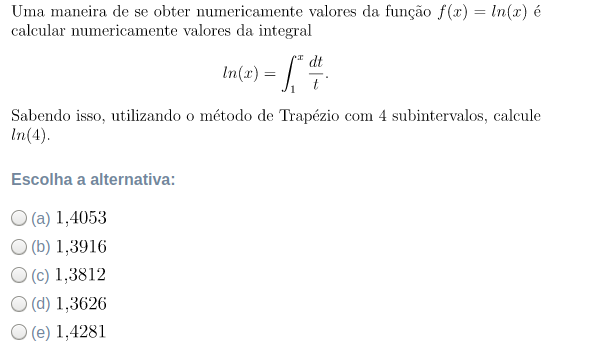

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return 1/x

def SomaAreas(y,h):
  A = 0

  dim = np.shape(y)

  for i in range(0, dim[0]):
    if (i==0) or (i==dim[0]-1):
      A += y[i]
    else:
      A += 2*y[i]

  A = (h/2)*A

  return A

n = 4
a = 1
b = 4

h = (b-a)/n

quant_trp = int((b-a)/h+1)

x = np.zeros(quant_trp, dtype=np.float)
x[0] = a

for i in range(1, quant_trp):
  x[i] = x[i-1]+h
   
x.astype(np.float)
#print(x)

y = f(x)
y.astype(np.float)

#print(y)

r = SomaAreas(y,h)
print(f'Resultado: {r}')

Resultado: 1.4280906593406595


# **MINITESTE**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return np.sqrt(1+(6*x-8)**2)

def SomaAreas(y,h):
  A = 0

  dim = np.shape(y)

  for i in range(0, dim[0]):
    if (i==0) or (i==dim[0]-1):
      A += y[i]
    else:
      A += 2*y[i]

  A = (h/2)*A

  return A

n = 6
a = 1
b = 5

h = (b-a)/n

quant_trp = int((b-a)/h+1)

x = np.zeros(quant_trp, dtype=np.float)
x[0] = a

for i in range(1, quant_trp):
  x[i] = x[i-1]+h
   
x.astype(np.float)
#print(x)

y = f(x)
y.astype(np.float)

#print(y)

r = SomaAreas(y,h)
print(f'Resultado: {r}')

Resultado: 41.707682076919696
